# 선형 회귀

- 연속형 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 불러오기

In [3]:
df = pd.read_csv('./datas/auto-mpg.csv', header = None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


### 2. 데이터 전처리

In [4]:
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [14]:
pd.set_option('display.max_columns', 10)

In [16]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [29]:
df['horsepower'].replace('?', np.nan, inplace = True)

In [31]:
df.dropna(inplace = True, subset = ['horsepower'])

In [32]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [34]:
df['horsepower'] = df['horsepower'].astype('float')    #타입 변환

In [36]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

### 3. 분석에 사용할 특성(열, 변수) 선택(연비, 실린더, 마력, 중력)

In [37]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


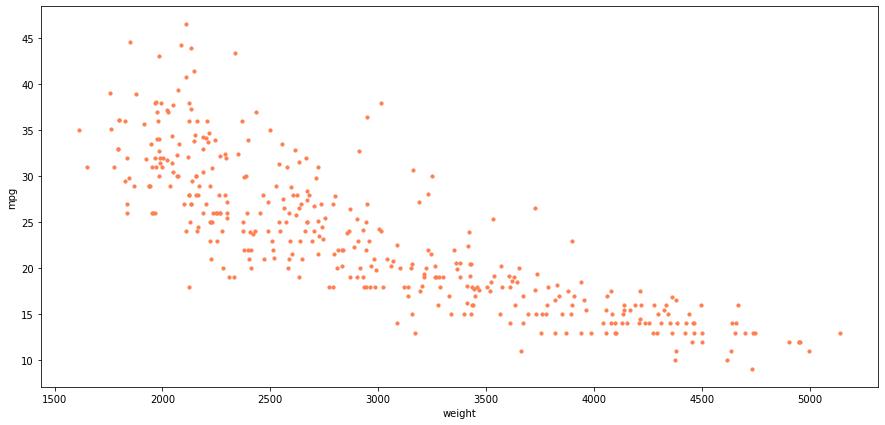

In [38]:
#종속변수(mgp)와 다른변수 간의 선형관계 존재 여부 확인
ndf.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s = 10, figsize = (15, 7))
plt.show()

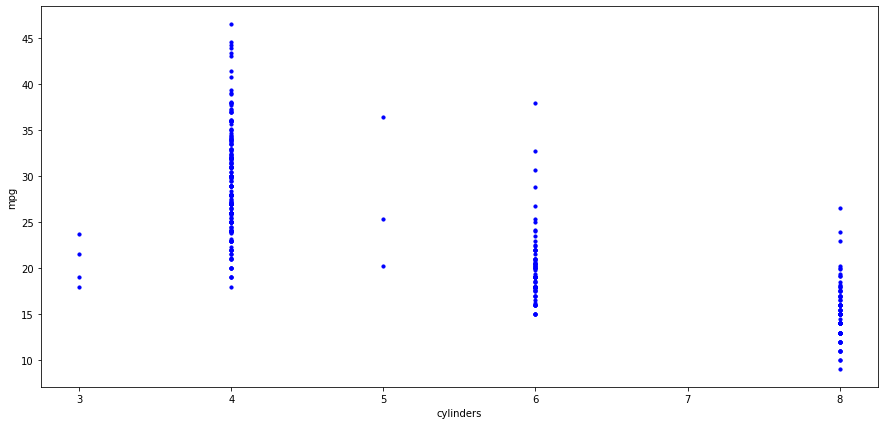

In [40]:
ndf.plot(kind = 'scatter', x = 'cylinders', y = 'mpg', c = 'blue', s = 10, figsize = (15, 7))
plt.show()

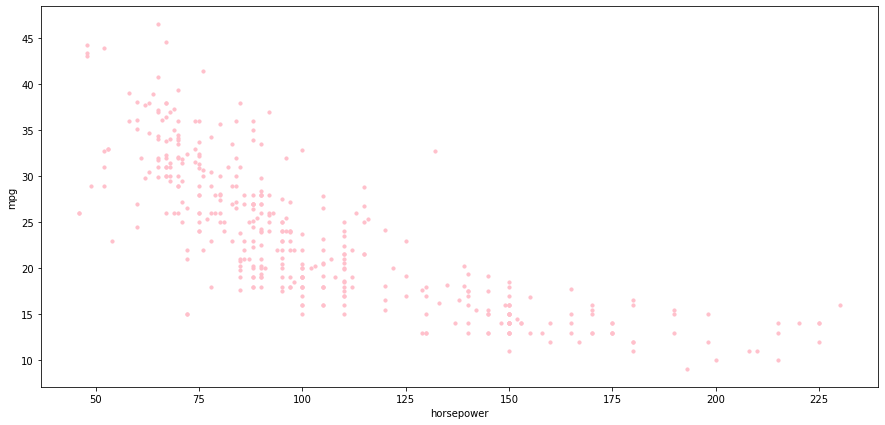

In [41]:
ndf.plot(kind = 'scatter', x = 'horsepower', y = 'mpg', c = 'pink', s = 10, figsize = (15, 7))
plt.show()

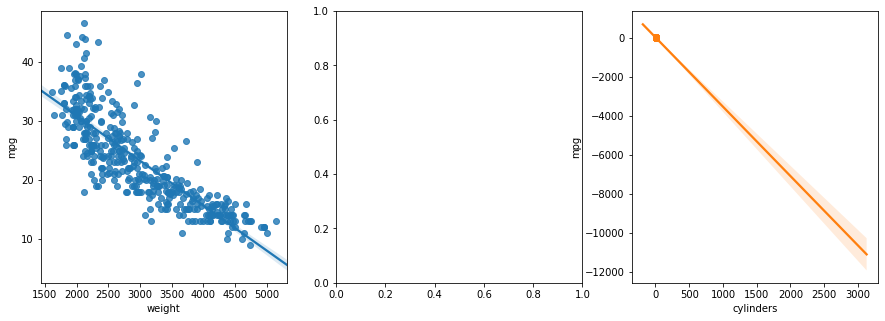

In [61]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax = ax1)
sns.regplot(x = 'cylinders', y = 'mpg', data = ndf, ax = ax2)
sns.regplot(x = 'horsepower', y = 'mpg', data = ndf, ax = ax3)
plt.show()
plt.close()

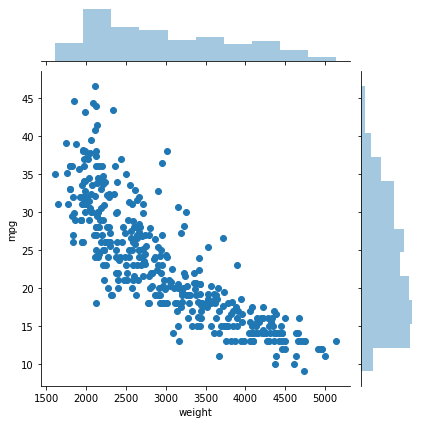

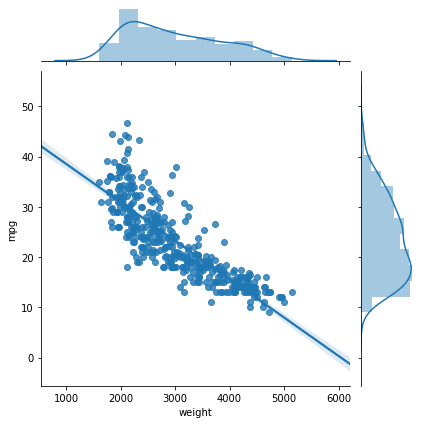

In [99]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg')  #회귀선 표시
plt.show()
plt.close()

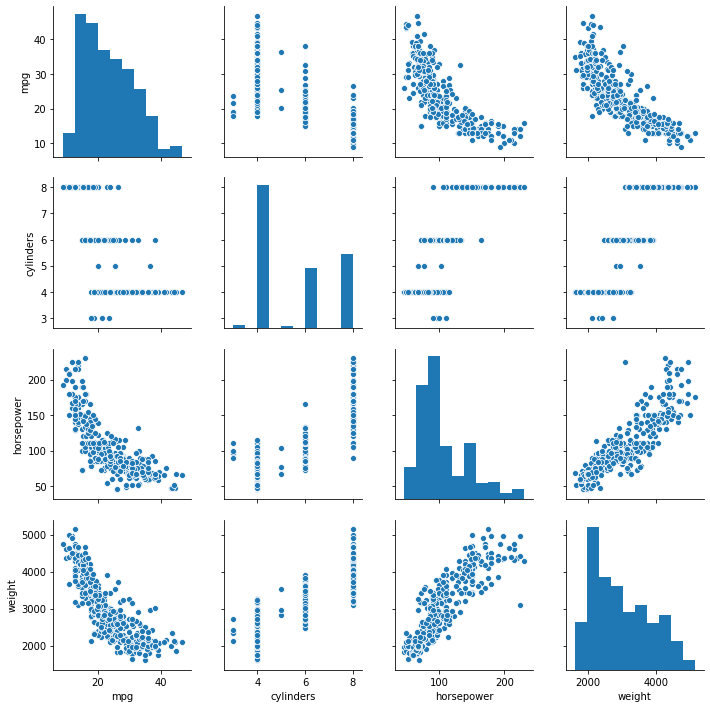

In [55]:
sns.pairplot(ndf)
plt.show()
plt.close()

### 4. 학습 데이터와 테스트 데이터 분리

In [62]:
X = ndf[['weight']]
Y = ndf[['mpg']]

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


### 5. 단순 회귀

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)    #학습

r_square = lr.score(X_test, Y_test)
print(r_square)

0.6822458558299325


In [67]:
print('기울기 a: ', lr.coef_)
print('절편 b: ', lr.intercept_)

기울기 a:  [[-0.00775343]]
절편 b:  [46.71036626]


In [69]:
y_predict = lr.predict(X)

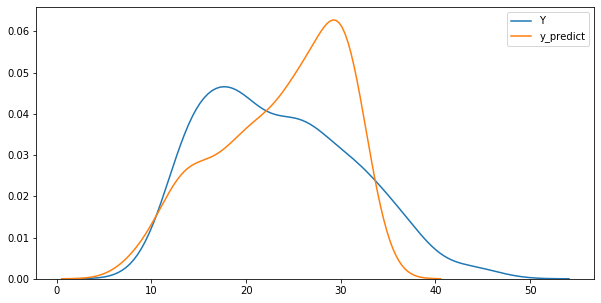

In [74]:
#실제 데이터와 예측 데이터 그래프
plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(y_predict, hist = False, label = 'y_predict', ax = ax1)
plt.show()
plt.close()

#무게만 영향을 주는 것이 아님을 알 수 있다.

### 5-1 다항 회귀

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape)
print(X_train.shape)

(274, 3)
(274, 1)


In [83]:
lr = LinearRegression()
lr.fit(x_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
x_test_poly = poly.fit_transform(X_test)   # X 테스트데이터를 2차항으로 변형
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :    0.7087009262975685

0.7087009262975685


In [87]:
print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

기울기 a :  [[ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]]
절편 b :  [62.58071222]


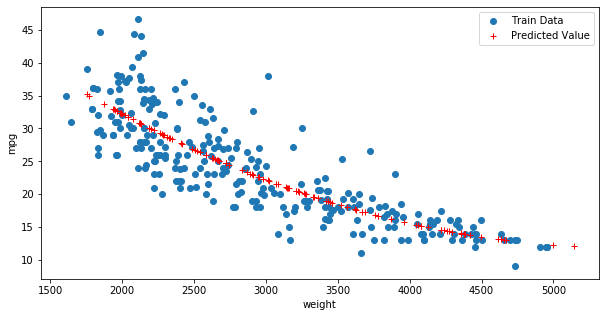

In [88]:
y_test_predict = lr.predict(x_test_poly)  #테스트 데이터에 대한 예측값 구하기

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, Y_train, 'o', label = 'Train Data')
ax.plot(X_test, y_test_predict, 'r+', label = 'Predicted Value')   #학습한 회귀선
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [89]:
X

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0
...,...
393,2790.0
394,2130.0
395,2295.0
396,2625.0


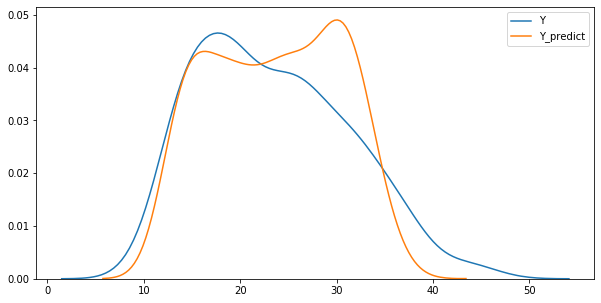

In [91]:
#전체 데이터 X를 2차항으로 변형
X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly)

fig = plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(y_predict, hist = False, label = 'Y_predict', ax = ax1)

plt.show()

### 5-2 다중 회귀

In [115]:
#5단계 : 다중 회귀분석  
X = ndf[['weight', 'horsepower', 'cylinders']]    
y = ndf[['mpg']]
    
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습 => 모델 생성

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print(r_square)    #결정 계수 :  

print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

train data 개수:  274
test data 개수:  118
0.6939048496695586
기울기 a :  [[-0.00522268 -0.03714088 -0.60691288]]
절편 b :  [46.41435127]


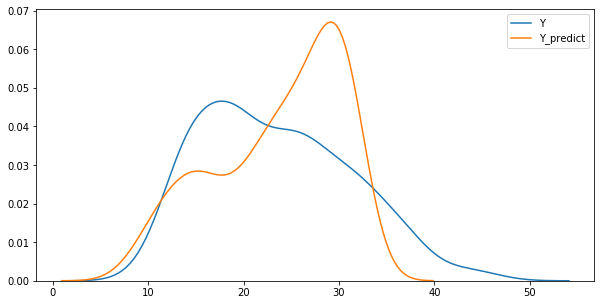

In [116]:
y_predict = lr.predict(X)

fig = plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(y_predict, hist = False, label = 'Y_predict', ax = ax1)

plt.show()

# 로지스틱 회귀

- 범주형 데이터

In [140]:
score=[56,60,61,67,69, 55,70,44,51,64, 60,50,68,72,90, 93,85,74,81,88, 92,97,77,78,98]
grade = [3.61, 2.93, 3.14, 4.00, 3.23, 3.89, 3.66, 3.51, 2.53, 3.61, 2.93, 3.14, 4.00, 3.23, 3.89, 3.66, 3.51, 2.53, 3.89, 3.66, 3.51, 2.53, 2.53, 3.61, 2.93]
_pass = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [142]:
df = pd.DataFrame({'score': score, 'grade': grade, '_pass': _pass})

In [144]:
df

,score,grade,_pass
0,56,3.61,0
1,60,2.93,0
2,61,3.14,0
3,67,4.00,0
4,69,3.23,0
5,55,3.89,0
6,70,3.66,0
7,44,3.51,0
8,51,2.53,0
9,64,3.61,0


In [153]:
X = df[['score', 'grade']]
Y = df['_pass']

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [155]:
len(X_train)

17

In [156]:
len(X_test)

8

In [157]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, Y_train)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
print('정확도: ', logR.score(X_train, Y_train))

정확도:  0.8823529411764706


In [159]:
print('정확도: ', logR.score(X_test, Y_test))

정확도:  0.875


In [160]:
#confusion matrix 기반 정확률, 지지율, F1계수, 재현율을 계산해서 보고서 반환
from sklearn.metrics import classification_report
y_predict = logR.predict(X_test)
print(classification_report(Y_test, y_predict))   #실제 합/불 테스트 데이터, 모형으로부터 예측된 합/불 테스트 데이터

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.83      0.91         6

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8



In [163]:
import statsmodels.api as sm
logit = sm.Logit(df['_pass'], X)   #로지스틱 회귀분석 실행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421913
         Iterations 7


In [167]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  _pass   No. Observations:                   25
Model:                          Logit   Df Residuals:                       23
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2019   Pseudo R-squ.:                  0.3849
Time:                        16:07:38   Log-Likelihood:                -10.548
converged:                       True   LL-Null:                       -17.148
Covariance Type:            nonrobust   LLR p-value:                 0.0002798
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
score          0.1315      0.054      2.453      0.014       0.026       0.237
grade         -2.6266      1.095     -2.399      0.016      -4.773      -0.481
==============================================================================
"""

In [164]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.385     
Dependent Variable: _pass            AIC:              25.0957   
Date:               2019-12-20 16:05 BIC:              27.5334   
No. Observations:   25               Log-Likelihood:   -10.548   
Df Model:           1                LL-Null:          -17.148   
Df Residuals:       23               LLR p-value:      0.00027983
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
score      0.1315     0.0536    2.4527   0.0142    0.0264    0.2366
grade     -2.6266     1.0950   -2.3988   0.0164   -4.7727   -0.4806
=================================================================

"""

In [165]:
result.params   #종속변수에 영향을 미치는 정도 파악(상관계수)

score    0.131494
grade   -2.626619
dtype: float64